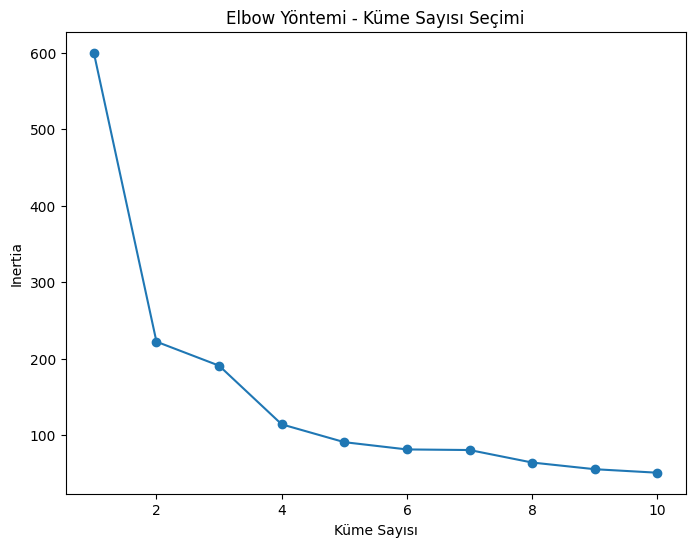

Aykırı veriler (standartlaştırılmış):
[[-1.02184904 -2.43394714 -0.14664056 -0.26238682]
 [ 0.18982966 -1.97355361  0.13754657 -0.26238682]
 [ 1.64384411  1.24920112  1.33113254  1.71209594]
 [ 2.24968346  1.70959465  1.6721571   1.31719939]
 [ 2.24968346 -1.05276654  1.78583195  1.44883158]
 [ 2.24968346 -0.59237301  1.6721571   1.05393502]
 [ 2.4920192   1.70959465  1.50164482  1.05393502]
 [ 2.24968346 -0.13197948  1.33113254  1.44883158]]


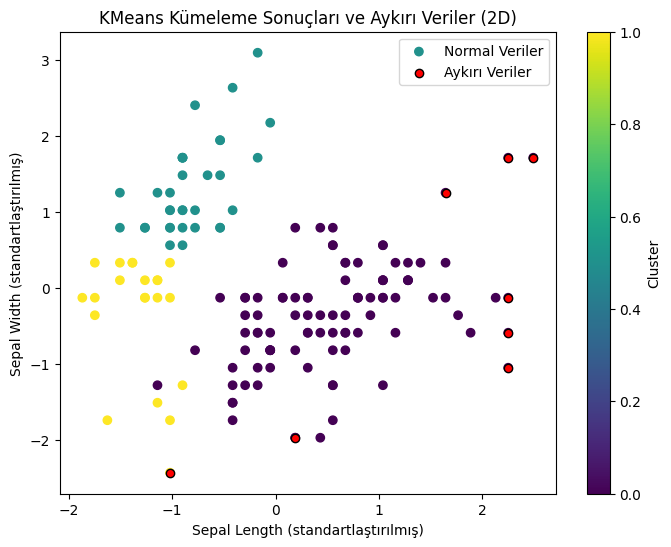

Silhouette Score (k=3): 0.4798814508199817


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Iris veri setini yükle
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Veriyi normalleştirme (standartlaştırma)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Elbow Yöntemi ile Küme Sayısı Seçimi
inertia = []  # Toplam inertia değerini saklayacağımız liste
k_range = range(1, 11)  # Küme sayısı 1 ile 10 arasında denenecek

# Farklı küme sayıları için inertia değerlerini hesapla
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Elbow grafiği
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')  # Küme sayısını ve inertia'yı çiz
plt.title("Elbow Yöntemi - Küme Sayısı Seçimi")
plt.xlabel("Küme Sayısı")
plt.ylabel("Inertia")  # Küme sayısı ile inertia arasındaki ilişki
plt.show()

# En iyi küme sayısını (örneğin k=3) Elbow grafiğinden seçtikten sonra
k_optimal = 3  # Elbow grafiğinden belirlenen optimal küme sayısı
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
labels = kmeans.fit_predict(data_scaled)

# Küme merkezlerini elde etme
cluster_centers = kmeans.cluster_centers_

# Her verinin küme merkezine olan mesafelerini hesaplama
distances = np.linalg.norm(data_scaled - cluster_centers[labels], axis=1)

# Aykırı verileri tespit etmek için mesafe eşiği belirleme
threshold = np.percentile(distances, 95)  # Mesafelerin %95'lik diliminin üstü aykırı kabul edilebilir

# Aykırı verileri seçme
outliers = data_scaled[distances > threshold]

# Aykırı verileri yazdırma
print(f"Aykırı veriler (standartlaştırılmış):\n{outliers}")

# Kümeleme sonuçlarını görselleştirme (2D)
plt.figure(figsize=(8, 6))

# Normal verileri scatter plot ile göster
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis', label='Normal Veriler')

# Aykırı verileri kırmızı renk ile göster
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Aykırı Veriler', edgecolor='black')

# Başlık ve etiketler
plt.title('KMeans Kümeleme Sonuçları ve Aykırı Veriler (2D)')
plt.xlabel('Sepal Length (standartlaştırılmış)')
plt.ylabel('Sepal Width (standartlaştırılmış)')
plt.colorbar(label='Cluster')
plt.legend()

# Grafiği göster
plt.show()

# Silhouette Score hesaplama (Modelin başarımını görmek için)
sil_score = silhouette_score(data_scaled, labels)
print(f"Silhouette Score (k={k_optimal}): {sil_score}")
